# Scatterplots of active region statistics: Cycle 22

### Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd
%matplotlib inline 

# Font Size

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 17}

plt.rc('font', **font)


A = np.fromfile('axcollect_correct_c22.dat',dtype=np.float32)
A = A.reshape(846,137)

N = np.fromfile('npole_correct_c22.dat',dtype=np.float32)
N = N.reshape(846,137)

S = np.fromfile('spole_correct_c22.dat',dtype=np.float32)
S = S.reshape(846,137)

axdipole2 = np.fromfile('axdipole2_c22.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(846):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    #index_npole = np.nonzero(A[i,:]);
    #start_npole.append(index_npole[0][0]);
    #begin_npole.append(N[i,start_npole[i]]);
    #index_spole = np.nonzero(S[i,:]);
    #start_spole.append(index_spole[0][0]);
    #begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
#start_npole = np.asarray(start_npole)
#start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
#begin_npole = np.asarray(begin_npole)
#begin_spole = np.asarray(begin_spole)

begin_rel = begin/(axdipole2[136]-axdipole2[0])
final = A[:,136]
final_rel = final/(axdipole2[136]-axdipole2[0])
#final_npole = N[:,131]
#final_spole = S[:,131]

total = []
#total_npole = []
#total_spole = []
for i in range(137):
    total.append(sum(A[:,i]))
    #total_npole.append(sum(N[:,i]))
    #total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/846*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
#strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
#weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
#reg_percent_npole = strong_npole.size/844*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
#strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
#weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
#reg_percent_spole = strong_spole.size/844*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_collect_c22.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_collect_c22.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_collect_c22.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(begin),(begin),(begin_rel)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

d = sorted(a, key=lambda column: np.abs(column[2]))
d = np.transpose(d)

### Plots

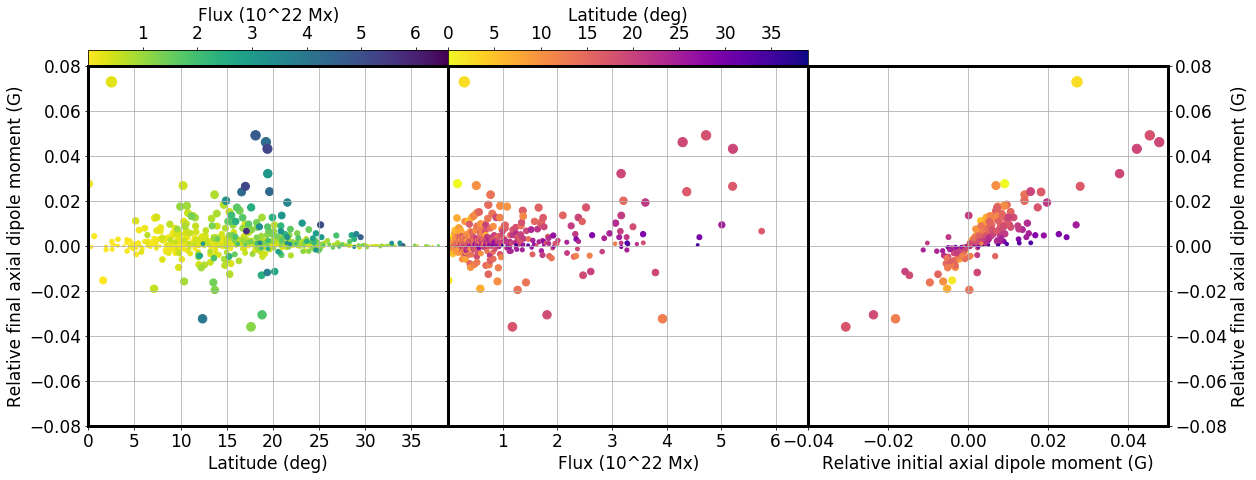

In [2]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1500    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

# Latitude Limits
lat1 = 0
lat2 = 39

latticks = np.arange(lat1,lat2,5)

# Flux Limits
fl1 = 0
fl2 = 6.6

fluxticks = np.arange(1,fl2,1)

#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])
cbaxes2 = fig.add_axes([ppadh+pxx/fszh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Latitude vs. Final Dipole
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter(abs(c[2]),c[4],szf*np.sqrt(abs(c[4])),abs(c[1])/1e22,cmap='viridis_r',vmin=fl1,vmax=fl2)
ax1.set_xlabel('Latitude (deg)')
ax1.set_xlim(lat1,lat2)
#ax1.set_title('Coloured by flux, sized by RFADM')
ax1.set_ylabel('Relative final axial dipole moment (G)')
ax1.grid()
ax1.set_xticks(latticks)

# Flux vs. Final Dipole
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
ax2.scatter(abs(c[1])/1e22,c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax2.set_xlabel('Flux (10^22 Mx)')
ax2.set_xlim(fl1,fl2)

#ax2.set_title('Coloured by time, sized by RFADM')
ax2.grid()
ax2.tick_params(labelleft='off') 
ax2.set_xticks(fluxticks)

# Initial Dipole vs. Final Dipole
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)

im3 = ax3.scatter(c[7],c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax3.set_xlabel('Relative initial axial dipole moment (G)')
#ax3.set_title('Coloured by flux, sized by RFADM')
ax3.set_xlim(-0.04,0.05)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Relative final axial dipole moment (G)')

# Setting Vertical Axis
ax1.set_ylim(-0.08,0.08)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Flux (10^22 Mx)')
cb1.set_ticks(ax2.get_xticks())
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')


# Adding Latitude Colorbar

cb2 = fig.colorbar(im3,cax=cbaxes2, orientation='horizontal')
cb2.set_label('Latitude (deg)')
cb2.set_ticks(latticks)
cbaxes2.xaxis.tick_top()
cbaxes2.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3) 

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3) 

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3) 


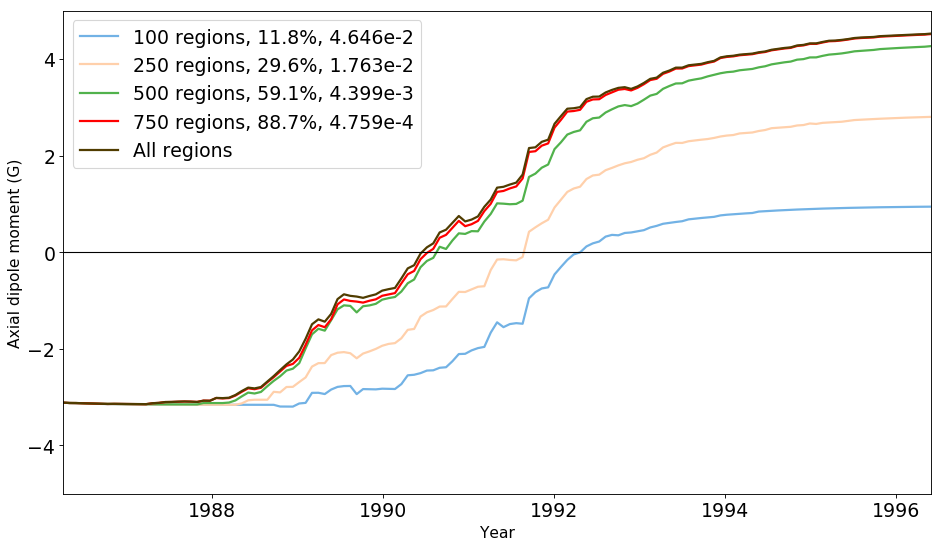

In [3]:
brown = (80/255,60/255,0)
green = (81/255,178/255,76/255)
blue = (114/255,178/255,229/255)
purple = (111/255,40/255,124/255)
peach = (1,208/255,171/255)

timeyear = (np.arange(1,138)*27.27+68)/365.25+1986

axdipole_100 = np.fromfile('axdipole_100_c22.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250_c22.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500_c22.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750_c22.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_100,color=blue,lw=2,label='100 regions, 11.8%, 4.646e-2')
plt.plot(timeyear,axdipole_250,color=peach,lw=2,label='250 regions, 29.6%, 1.763e-2')
plt.plot(timeyear,axdipole_500,color=green,lw=2,label='500 regions, 59.1%, 4.399e-3')
plt.plot(timeyear,axdipole_750,'red',lw=2,label='750 regions, 88.7%, 4.759e-4')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[136]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[136])
plt.ylim(-5,5)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Axial dipole moment (G)',fontsize=14)
plt.legend()
plt.show()